# Machine Learning

In [1]:
import pandas as pd

reviews_uc = pd.read_csv("polyratings_reviews.csv")
reviews = reviews_uc.drop(reviews_uc[["Unnamed: 0", "Unnamed: 0.1"]], axis = 1) # proper indexing
reviews["review_content"] = reviews["review_content"].fillna("") # accounts for empty reviews

reviews.head()

,class,class_abrv,class_number,review_content,review_month,review_year,student_gpa,student_grade,student_major,student_rank,student_standing,teacher_difficulties,teacher_field,teacher_name,teacher_presentaion,teacher_rating
0,CPE 215,CPE,215,"he knows what he's talking about, he knows how...",Aug,2001,4.0,A,Required (Major),1,Sophomore,3.64,Computer Science,"Connely, John",3.45,3.41
1,CPE 215,CPE,215,"In two years being here at Cal Poly, Dr Connel...",Aug,2001,4.0,A,Required (Major),1,Sophomore,3.64,Computer Science,"Connely, John",3.45,3.41
2,CPE 215,CPE,215,Connely's an excellent professor. I've had hi...,Aug,2001,3.0,B,Required (Major),2,Junior,3.64,Computer Science,"Connely, John",3.45,3.41
3,CPE 215,CPE,215,"This guy knows what he is talking about, and h...",Aug,2001,4.0,A,Required (Major),1,Sophomore,3.64,Computer Science,"Connely, John",3.45,3.41
4,CPE 215,CPE,215,I could go on and on about how great of a teac...,Dec,1999,4.0,A,Required (Support),2,Junior,3.64,Computer Science,"Connely, John",3.45,3.41


## K-Means Clustering of Reviews

In [2]:
test_set = reviews.sample(frac=.05)

In [3]:
test_set.count()[0]

3251

Using a sample of the data collected because there's an unusually high variety of words. The sample size for our test data-set is twice as long as the Obama Tweets data-set.

In [4]:
from collections import Counter

# creation of bag of words
words = (
    test_set.review_content
    .str.lower()
    .str.replace("[^\w\s]", "") 
    .str.split()
    .apply(Counter)
)

In [5]:
tf = pd.DataFrame(list(words)).fillna(0)

In [ ]:
(tf.sum() > 2).value_counts()

In [17]:
# removes a lot of random words
trunc_idf = tf_idf[tf_idf.columns[tf_idf.sum() > 20]]

In [20]:
from sklearn.cluster import KMeans

# Make cluster from size n = 2 to n = 6

for n in range(2, 7):
    model = KMeans(n_clusters = n)
    model.fit(trunc_idf)
    clusters = model.labels_
    test_set["model_" + str(n)] = clusters       

test_set.to_csv("kmeans_test_set.csv")

### Auto-Moderator Learning Model (K-nearest neighbors)

Factors Used in the Model (X):
- review_content (in the form of TF-IDF words)
- class_abv (varies by major)
- class_number (difficulty increases over time)

Predicting (Y):
- teacher_presentation
- teacher_difficulties
- teacher_rating

In [74]:
X_train = pd.get_dummies(beer.drop(["id", "description", "ibu", "name"], axis=1))
y_train = beer["ibu"]

** Using K-Nearest Neighbors **

In [75]:
def get_Kneighbors_test_error(k):
    scaler = StandardScaler()
    model = KNeighborsRegressor(n_neighbors=k)
    pipeline = Pipeline([('transform', scaler), ('fit', model)])
    return np.sqrt(np.abs(cross_val_score(pipeline, X_train, y_train, cv=10, scoring="neg_mean_squared_error").mean()))

In [76]:
ks = pd.Series(range(1, 51, 1))
ks.index = ks

k_cross_val = ks.apply(get_Kneighbors_test_error)

20

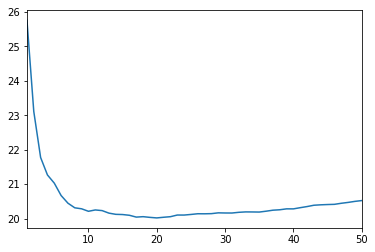

In [78]:
k_cross_val.plot()
k_cross_val.idxmin()

**20** appears to be a good k-value to use as it achieves the lowest typical error in our set of k-values.

In [80]:
import sys

model = KNeighborsRegressor(n_neighbors=20)
model.fit(X_train, y_train)

X_test = pd.get_dummies(beer_test.drop(["id", "description", "ibu", "name"], axis=1))
beer_test["ibu"] = model.predict(X_test)

orig_stdout = sys.stdout
outfile = open('kneighbors_test.csv', 'w')
sys.stdout = outfile

print((beer_test[["id", "ibu"]].set_index("id")).to_csv())

sys.stdout = orig_stdout
outfile.close()